In [2]:
import sys
if True: # On colab
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    root = "/content/drive/My Drive/Colab Notebooks/omega/"
    sys.path.append("/content/drive/My Drive/Colab Notebooks/omega/")
else: # Local
    root = './'

Mounted at /content/drive


In [3]:
!pip3 install cmocean
!pip3 install git+https://github.com/rtqichen/torchdiffeq

     |████████████████████████████████| 225kB 2.8MB/s 
  Cloning https://github.com/rtqichen/torchdiffeq to /tmp/pip-req-build-d551ywpp
  Running command git clone -q https://github.com/rtqichen/torchdiffeq /tmp/pip-req-build-d551ywpp
  Created wheel for torchdiffeq: filename=torchdiffeq-0.1.0-cp36-none-any.whl size=29445 sha256=4892fab043db5c18e1013b4da0af4ba072fad3f0334ce25ee0e6c8b33dbcc09e
  Stored in directory: /tmp/pip-ephem-wheel-cache-dtsiuvrk/wheels/3f/76/69/01867bf3355c3bc8bae7e556b17b44c395b6cda5e76fd8ddc7
Successfully built torchdiffeq


In [3]:
import do_all
import importlib
importlib.reload(do_all)
from do_all import *

Using the CPU
Using the CPU


In [5]:
N_DATA_TO_TRAIN

[500, 1000, 2000, 20000, 200000]

In [8]:
baselines = make_baseline_numerical_solutions()

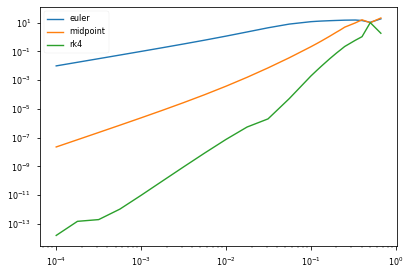

In [9]:
for scheme in baselines:
    x,y = zip(*baselines[scheme].items())
    plt.loglog([T_MAX_TO_INFER/_x for _x in x], y, label=scheme)
plt.legend()

Training for euler at dt=0.40080160320641284.
Using the CPU
Training for euler at dt=0.40080160320641284.
Using the CPU
Training for euler at dt=0.40080160320641284.
Using the CPU
Training for euler at dt=0.40080160320641284.
Using the CPU
Training for euler at dt=0.40080160320641284.
Using the CPU
Training for euler at dt=0.2002002002002002.
Using the CPU
Training for euler at dt=0.2002002002002002.
Using the CPU
Training for euler at dt=0.2002002002002002.
Using the CPU
Training for euler at dt=0.2002002002002002.
Using the CPU
Training for euler at dt=0.2002002002002002.
Using the CPU
Training for euler at dt=0.10005002501250625.
Using the CPU
Training for euler at dt=0.10005002501250625.
Using the CPU
Training for euler at dt=0.10005002501250625.
Using the CPU
Training for euler at dt=0.10005002501250625.
Using the CPU
Training for euler at dt=0.10005002501250625.
Using the CPU
Training for euler at dt=0.01000050002500125.
Using the CPU
Training for euler at dt=0.01000050002500125.

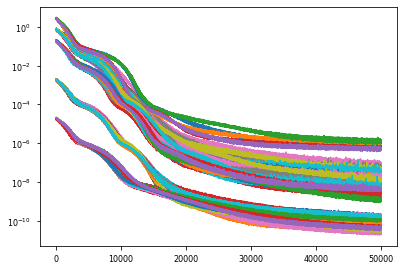

In [8]:
results = train_all_models_for_infinite_data()

In [5]:
def dictplot(d, ax=None, **kwargs):
    if ax is None:
        ax = plt
    x,y = zip(*d.items())
    ax.loglog([T_MAX_TO_INFER/_x for _x in x], y, **kwargs)

In [15]:
colorwheel = cycle('rkgby')
# colorwheel = cycle(['#000000','#ef3b2c','#2171b5','#984ea3','#de2d26','#ff7f00','#6a3d9a'])
markerwheel = cycle('osd')
colordict = defaultdict(lambda : next(colorwheel))
markerdict = defaultdict(lambda:next(markerwheel))

euler
midpoint
rk4


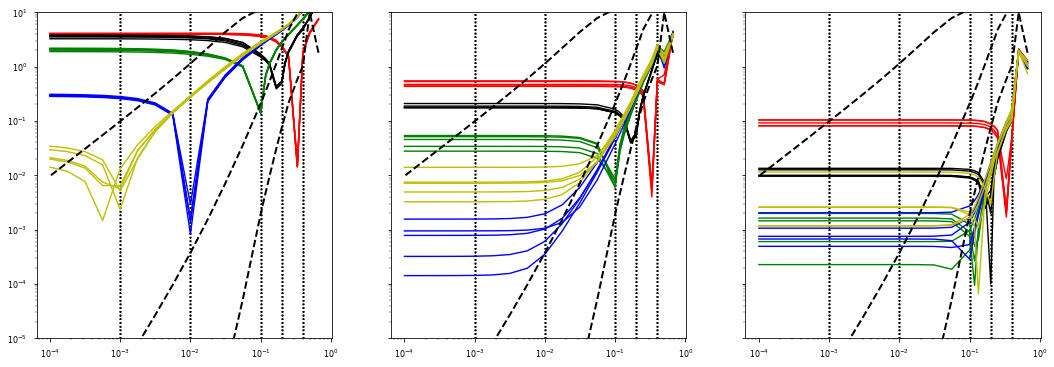

In [17]:
#plt.figure(figsize=(12,3))
#fig,axs = plt.subplots(1, 3, sharey=True)
#plt.figure()
fig,axs = plt.subplots(1, 3, sharey=True,figsize=(18,6))
Y_MAX = 10
Y_MIN = 10e-6
for ax,scheme in zip(axs,results):
    print(scheme)
    for result in results[scheme]:
        dictplot(result.errors, ax=ax,
                 label=f'{result.dt_data:0.5f}', color=colordict[result.dt_data])
        ax.vlines(result.dt_data, Y_MIN, Y_MAX, linestyle='dotted')
    for base_scheme in baselines:
        dictplot(baselines[base_scheme], ax=ax, color='black', linewidth=2, linestyle='dashed')
    # ax.legend()
plt.ylim(Y_MIN, Y_MAX)
plt.show()


Plot the losses

euler
midpoint
rk4


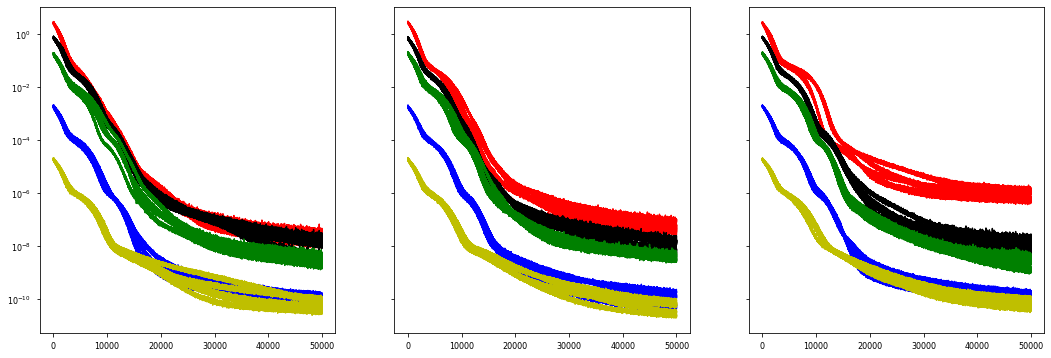

In [23]:
fig,axs = plt.subplots(1, 3, sharey=True,figsize=(18,6))
for ax,scheme in zip(axs,results):
    print(scheme)
    for result in results[scheme]:
        ax.semilogy(result.losses,
                 label=f'{result.dt_data:0.5f}', color=colordict[result.dt_data])
plt.show()

In [11]:
results

{'euler': [Result(model=ShallowODE(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=50, bias=True)
    (1): Tanh()
    (2): Linear(in_features=50, out_features=2, bias=True)
  )
), training_scheme='euler', dt_data=0.3992015968063872, losses=array([2.47712966e+00, 2.51852547e+00, 2.53701006e+00, ...,
       2.68522504e-08, 2.03924373e-08, 2.98724637e-08]), errors={3: 7.379580188600831, 4: 4.192375958988523, 5: 1.8445108598426525, 6: 0.014970488265580692, 8: 1.4987598342945003, 9: 1.9409758867359508, 10: 2.379508700889033, 12: 3.0149202873372674, 15: 3.488612206197656, 17: 3.6546817644826515, 20: 3.8034696977502476, 36: 4.025104430133099, 64: 4.071909863335845, 113: 4.08177410975245, 200: 4.083513018649373, 356: 4.083481691853666, 633: 4.083178858535134, 1125: 4.082925314148033, 2000: 4.082757374550923, 3557: 4.082655071186444, 6325: 4.082595134813168, 11247: 4.082560667215347, 20000: 4.082541042996361}),
  Result(model=ShallowODE(
  (net): Sequential(
    (0): Linear(in

In [12]:
torch.save?

In [14]:
root

'/content/drive/My Drive/Colab Notebooks/omega/'

In [16]:
torch.save(results, root+"bigsweep.pkl")

In [4]:
results = torch.load(root+"bigsweep.pkl")